In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import missingno

plt.style.use('seaborn')


In [ ]:
df = pd.read_csv('/content/aavail-data-visualization.csv')
df.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [ ]:
df.describe()

,customer_id,age,num_streams
count,1000.000000,1000.000000,954.000000
mean,500.500000,27.532000,17.780922
std,288.819436,9.120096,4.752115
min,1.000000,14.000000,1.000000
25%,250.750000,21.000000,15.000000
50%,500.500000,24.000000,19.000000
75%,750.250000,33.000000,21.000000
max,1000.000000,57.000000,29.000000


In [ ]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))
print('Total number of missing value - {}'.format(df.isnull().sum().sum()))

Missing Value Summary
-----------------------------------
customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64
Total number of missing value - 118


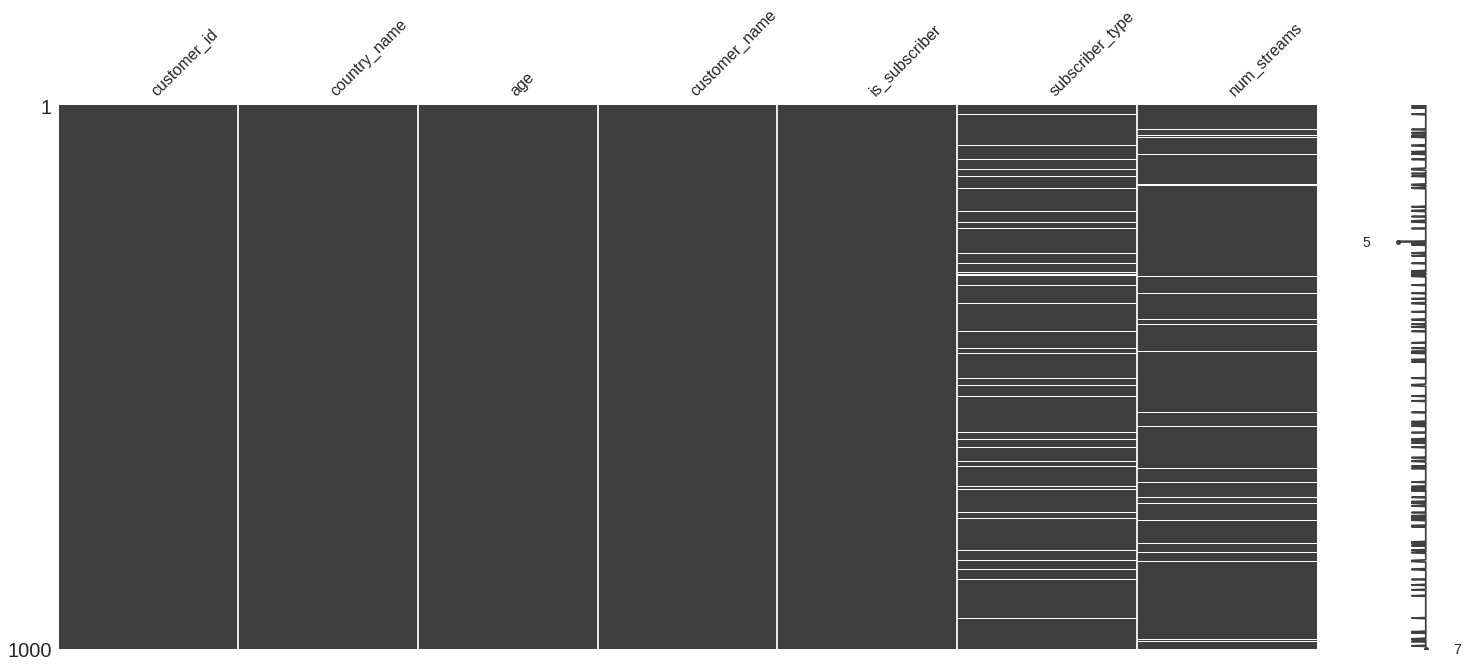

In [ ]:
missingno.matrix(df)

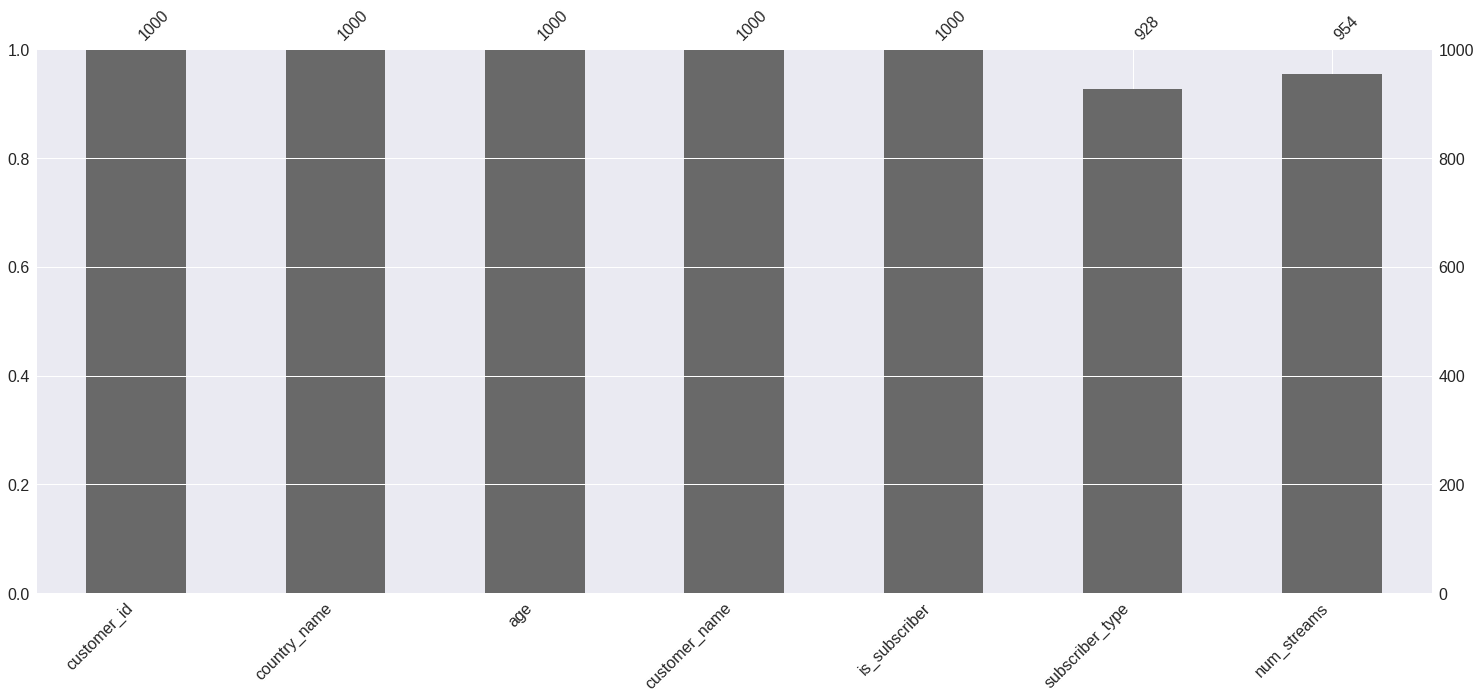

In [ ]:
missingno.bar(df)

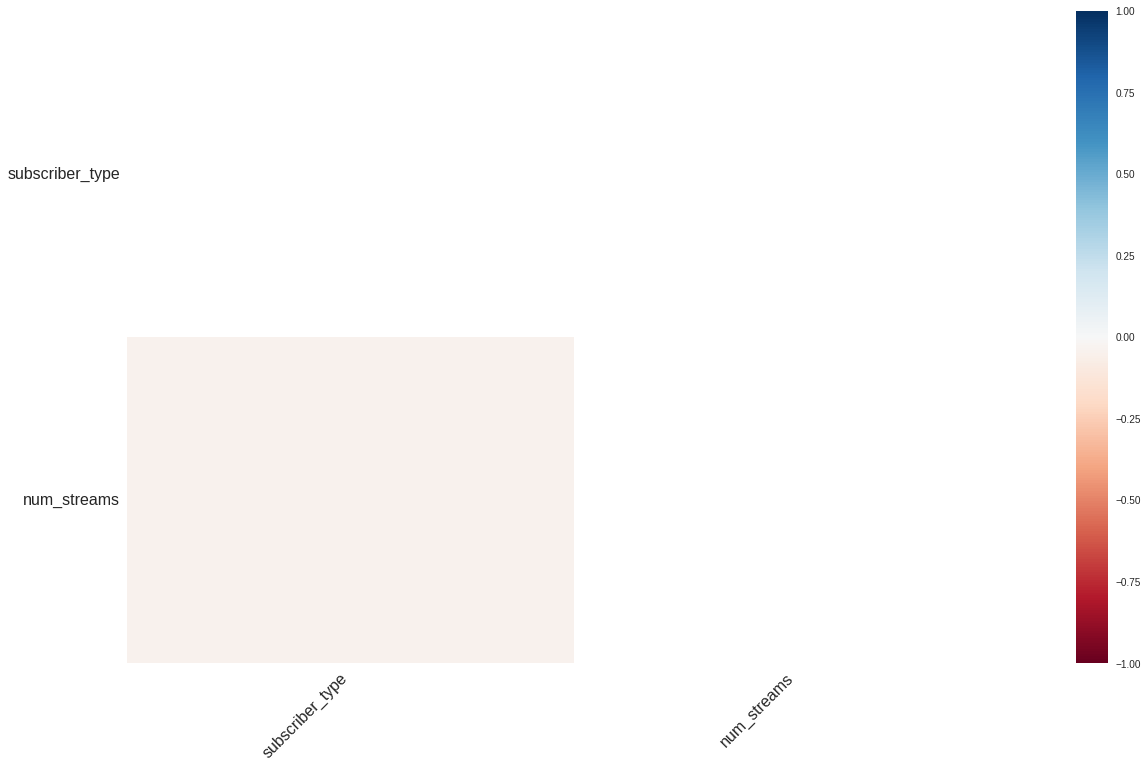

In [ ]:
missingno.heatmap(df)

In [ ]:
df_nan = df[df.isna().any(axis=1)]
df_nan.head(20)

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
5,6,united_states,22.0,Deshawn Murray,True,aavail_premium,NaN
17,18,singapore,45.0,Zayne Torres,False,NaN,17.0
45,46,singapore,22.0,Megan Shepard,True,aavail_basic,NaN
51,52,united_states,44.0,Lindsey Curry,True,NaN,22.0
56,57,united_states,16.0,Fox Houston,True,aavail_basic,NaN
59,60,united_states,20.0,Aryan Norton,True,aavail_basic,NaN
74,75,united_states,30.0,Genesis Weaver,True,NaN,6.0
75,76,united_states,22.0,Mabel Miranda,True,NaN,22.0
86,87,singapore,23.0,Briar Alvarez,False,aavail_premium,NaN


Dropping NaN values


In [ ]:
df = df.dropna()
df.shape

(883, 7)

In [ ]:
df.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
6,7,singapore,49.0,Daxton Tate,False,aavail_basic,18.0


###Visualizing Churn

In [ ]:
fig = px.histogram(df, x="country_name", color="is_subscriber",width=400, height=400, color_discrete_sequence = ['darkred', 'black'])
fig.show()

Churn is notably higher in Singapore

In [ ]:
fig = px.histogram(df, x="age", color="is_subscriber",width=400, height=400, color_discrete_sequence = ['darkred', 'black'])
fig.show()

Churn is higher in customers aged 18-28